**본 코드는 Colab에서 작성되었으며, 코드 정리를 위해 Markdown을 베이스로 한 코랩 목차를 활용하였습니다.**

**Colab 환경에서의 목차 이동을 추천드립니다.**

---


# Google Colab with Google Drive


In [330]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


---


# PIP Install (UCI_Repo)


In [331]:
!pip install ucimlrepo
!pip install --upgrade scikit-learn

---


# Library Import


In [332]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')



---


# Random Seed fix

In [333]:
import random as python_random # 시드값 고정
seed_num = 42
np.random.seed(seed_num)
python_random.seed(seed_num)



---


# Version

In [334]:
import platform

# OS
platform.platform()

'Linux-5.15.120+-x86_64-with-glibc2.35'

In [335]:
# 런타임 유형 : CPU
print('런타임 유형 : CPU')
print()
!cat /proc/cpuinfo

런타임 유형 : CPU

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignme

In [336]:
import sys
import sklearn
import numpy
import pandas
import matplotlib

sys.version
print('-Google Colab-')
!cat /etc/issue.net
!python --version
print('Numpy ' + numpy.__version__)
print('Pandas ' + pandas.__version__)
print('Sklearn ' + sklearn.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Seaborn ' + sns.__version__)

-Google Colab-
Ubuntu 22.04.3 LTS
Python 3.10.12
Numpy 1.23.5
Pandas 1.5.3
Sklearn 1.3.2
Matplotlib 3.7.1
Seaborn 0.12.2


---


# Dataset Import (Wisconsin Dataset)


In [337]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

dataset = pd.DataFrame(X)
label = pd.DataFrame(y)
dataset = pd.concat([dataset,label],axis=1)
dataset.head(5) # price -> target Y로 설정

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


---


# Simple EDA

## Dtype

In [338]:
# info
display(dataset.info())
print()

# data type
print('DATA_TYPE\n')
print('dtype이 object인 column')
display(dataset.dtypes[dataset.dtypes == object])
print()
print('dtype이 int인 column')
display(dataset.dtypes[dataset.dtypes == int])
print()
print('dtype이 float인 column')
display(dataset.dtypes[dataset.dtypes == float])
print()

# describe
display(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

None


DATA_TYPE

dtype이 object인 column


Diagnosis    object
dtype: object


dtype이 int인 column


Series([], dtype: object)


dtype이 float인 column


radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Missingno

<Axes: >

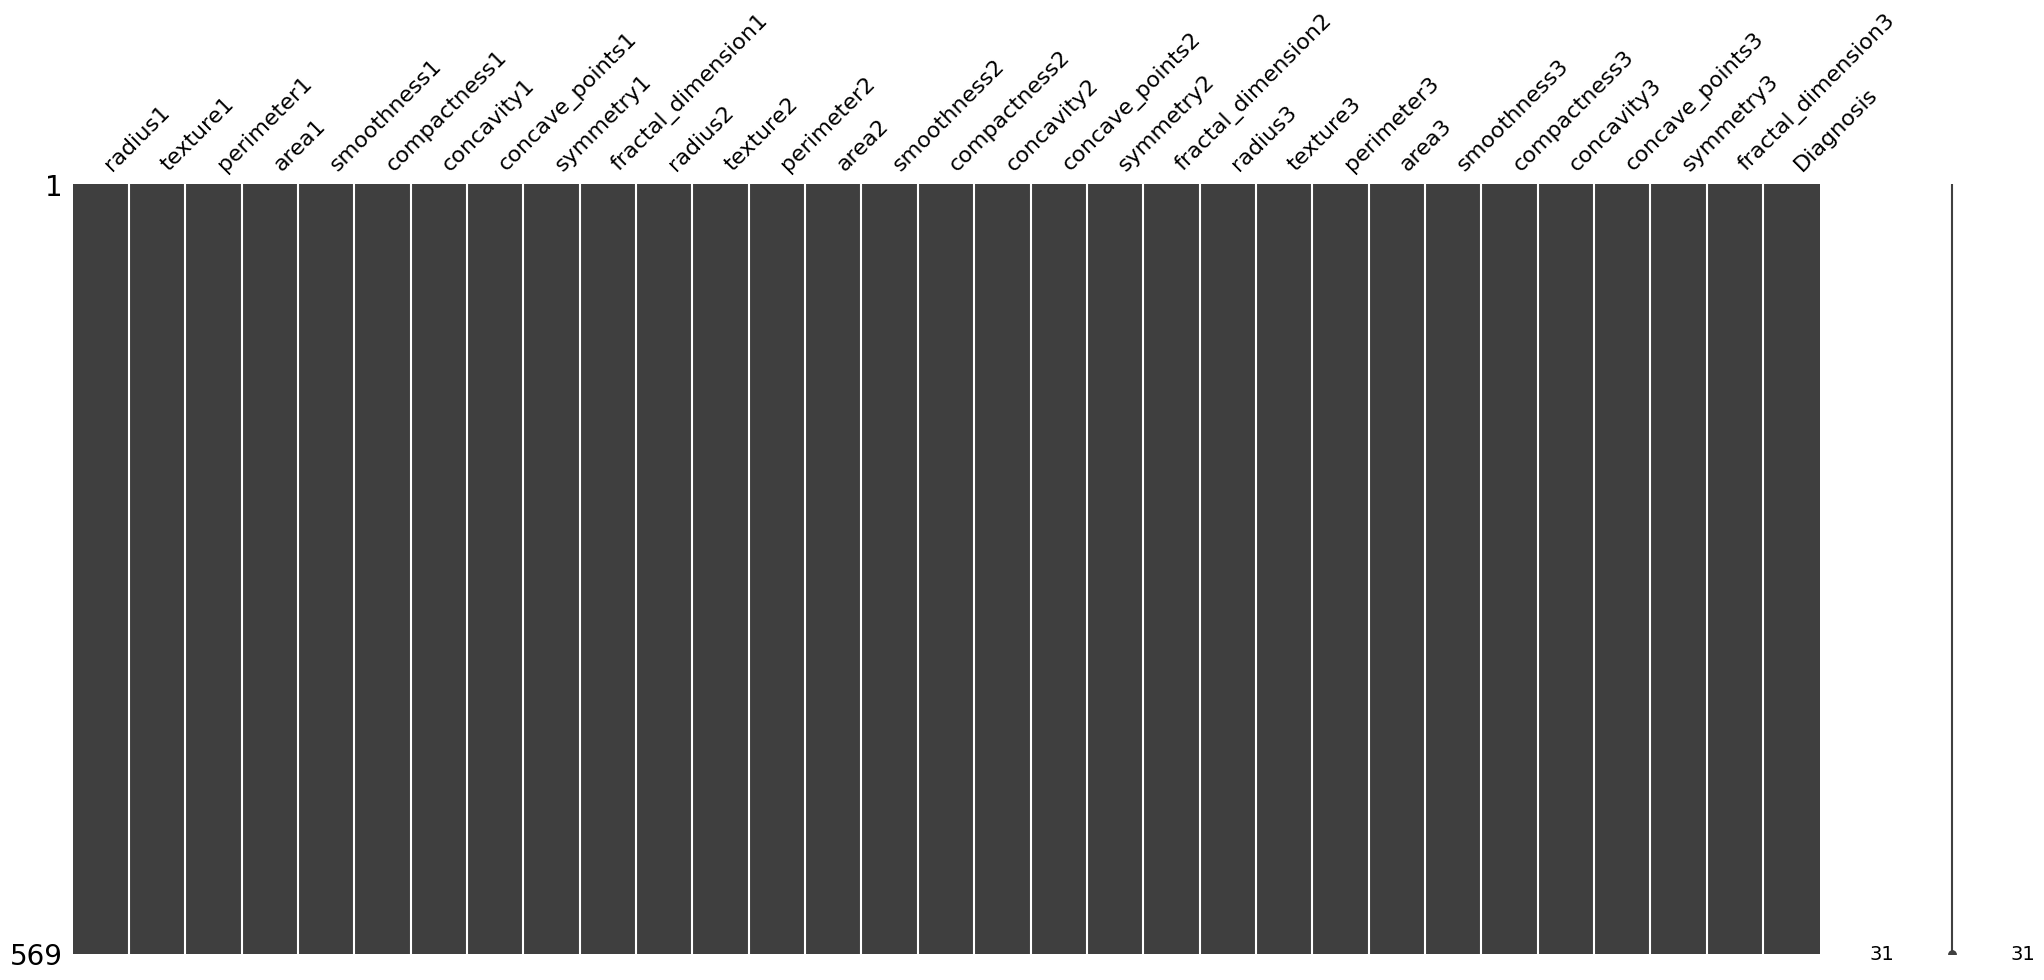

In [339]:
msno.matrix(dataset)

In [340]:
print('Dataset의 Row 수 : {}\n'.format(dataset.shape[0]))
print('결측치가 있는 Row 수 : {}\n'.format(dataset.shape[0] - dataset.dropna().shape[0]))

Dataset의 Row 수 : 569

결측치가 있는 Row 수 : 0



## Histogram

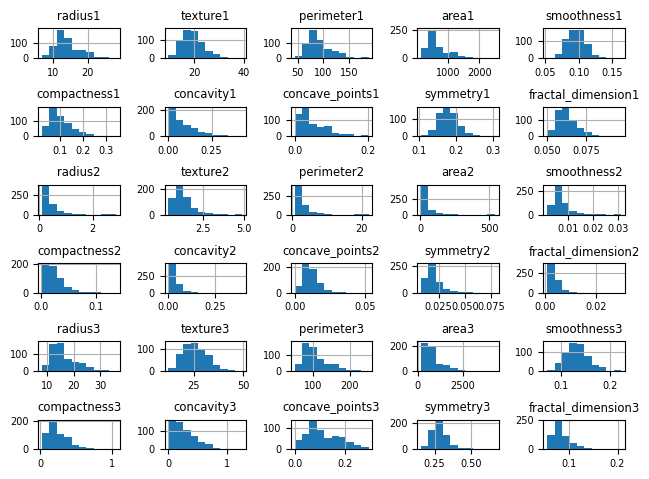

In [341]:
plt.rc('font', size=7)
dataset.iloc[:,:].hist()
plt.tight_layout()

## Categorical Column

In [342]:
cat_cols = []
for i in dataset.columns :
  if dataset[i].dtype == 'object' :
    cat_cols.append(i)

for i in cat_cols :
  print('{} : {}.  총 {}개\n'.format(i,dataset[i].unique(),dataset[i].nunique()))

dataset['Diagnosis'].value_counts()

Diagnosis : ['M' 'B'].  총 2개



B    357
M    212
Name: Diagnosis, dtype: int64

---


# Preprocessing

## Train / Test

In [343]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 나머지 세트로 분할 (85% / 15%)
train_set, test_set = train_test_split(dataset, test_size=0.15, stratify=dataset['Diagnosis'], random_state=42)
print('Trainset의 SIZE : {}\n'.format(train_set.shape[0]))
print('Testset의 SIZE : {}\n'.format(test_set.shape[0]))

Trainset의 SIZE : 483

Testset의 SIZE : 86



## Missing Value

## Categorical Feature Encoding

In [344]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_set['Diagnosis'])
train_set['Diagnosis'] = le.transform(train_set['Diagnosis'])
test_set['Diagnosis'] = le.transform(test_set['Diagnosis'])

le.classes_

array(['B', 'M'], dtype=object)

## DataScaling

In [345]:
# Y 에 대해서는 Scaling 적용이 일반적으로 불필요
train_set.iloc[:,:30] = np.log1p(train_set.iloc[:,:30])
test_set.iloc[:,:30] = np.log1p(test_set.iloc[:,:30])
# from sklearn.preprocessing import MinMaxScaler

# mm = MinMaxScaler()

# train_set.iloc[:,:30] = mm.fit_transform(train_set.iloc[:,:30])
# test_set.iloc[:,:30] = mm.fit_transform(test_set.iloc[:,:30])

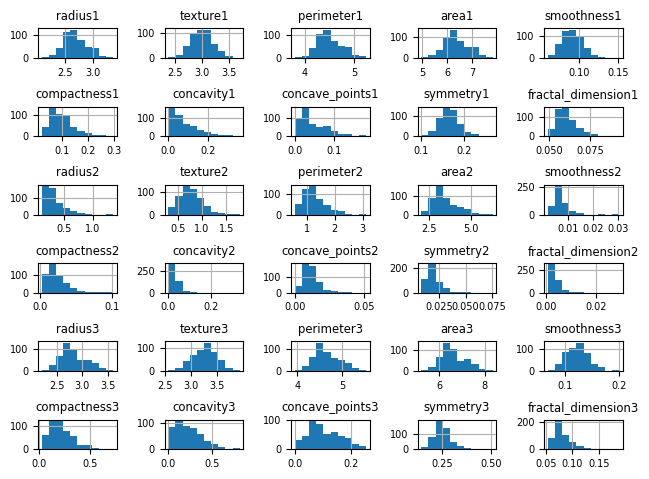

In [346]:
plt.rc('font', size=7)
train_set.iloc[:,:30].hist()
plt.tight_layout()

In [347]:
train_set

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
357,2.699346,2.845491,4.494462,6.388057,0.083817,0.053465,0.014908,0.020665,0.133131,0.057165,...,3.280159,4.582311,6.544487,0.109123,0.096037,0.051501,0.054071,0.212042,0.068714,0
352,3.285787,2.915606,5.165928,7.606387,0.108765,0.212123,0.290279,0.175045,0.178648,0.059410,...,3.201933,5.439383,8.081784,0.142367,0.466058,0.497801,0.243417,0.314081,0.084479,1
224,2.658159,2.891482,4.449101,6.305180,0.081073,0.048733,0.034923,0.024263,0.139414,0.055189,...,3.202746,4.603569,6.564983,0.120091,0.123191,0.164327,0.092379,0.223623,0.073464,0
467,2.367249,2.949688,4.128102,5.660527,0.079837,0.052858,0.014682,0.005752,0.155293,0.062148,...,3.243373,4.278193,5.943324,0.129975,0.118227,0.062120,0.024693,0.266739,0.075803,0
2,3.029650,3.102342,4.875197,7.093405,0.104000,0.148334,0.180153,0.120357,0.188055,0.058259,...,3.278276,5.033701,7.444249,0.134880,0.353821,0.371839,0.217528,0.308440,0.083955,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2.556452,3.098740,4.348858,6.074886,0.093244,0.078072,0.025229,0.021556,0.183904,0.061001,...,3.339677,4.455393,6.261301,0.133306,0.197785,0.110109,0.079393,0.268117,0.070934,0
458,2.639057,3.263084,4.426163,6.256134,0.080372,0.049485,0.011988,0.017467,0.154179,0.053057,...,3.492865,4.522441,6.444926,0.114935,0.103729,0.043653,0.057523,0.207502,0.061010,0
476,2.721295,3.069447,4.536998,6.428751,0.085544,0.105080,0.049390,0.030122,0.140284,0.058354,...,3.341447,4.728272,6.720823,0.109123,0.294831,0.224103,0.125663,0.225860,0.075645,0
72,2.901422,3.239462,4.746670,6.835615,0.101744,0.168054,0.156320,0.076442,0.176220,0.062853,...,3.550192,5.027820,7.427739,0.147126,0.553540,0.504767,0.173869,0.286156,0.125663,1




---

## Train / Valid



In [348]:
from sklearn.model_selection import train_test_split

# 데이터셋을 훈련 세트와 나머지 세트로 분할 (85% / 15%)
train, valid = train_test_split(train_set, test_size=0.15, stratify=train_set['Diagnosis'], random_state=42)

test = test_set.copy()

print('Trainset의 SIZE : {}\n'.format(train.shape[0]))
print('Validset의 SIZE : {}\n'.format(valid.shape[0]))
print('Testset의 SIZE : {}\n'.format(test.shape[0]))

Trainset의 SIZE : 410

Validset의 SIZE : 73

Testset의 SIZE : 86





---


#EDA

## Histogram

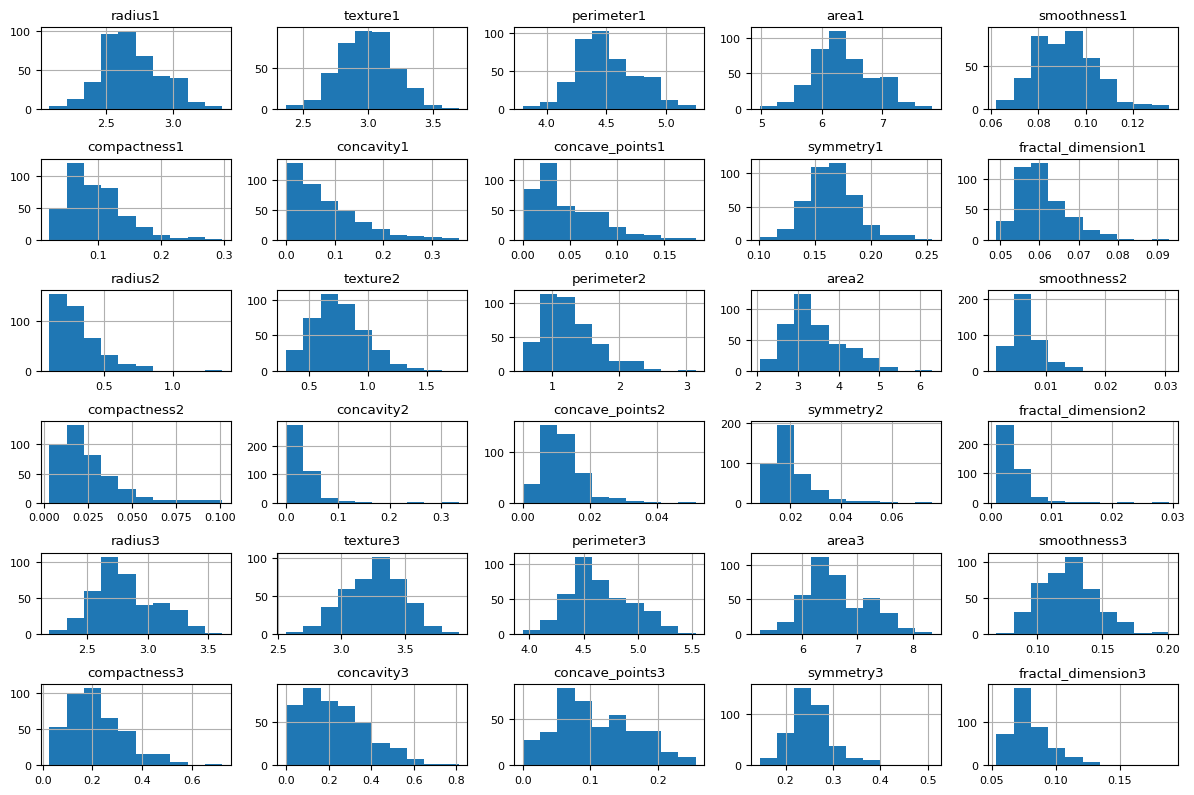

In [349]:
plt.rc('font', size=8)
# nunique가 6개 이상인 column만 선택
train.iloc[:,:30].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

<Axes: >

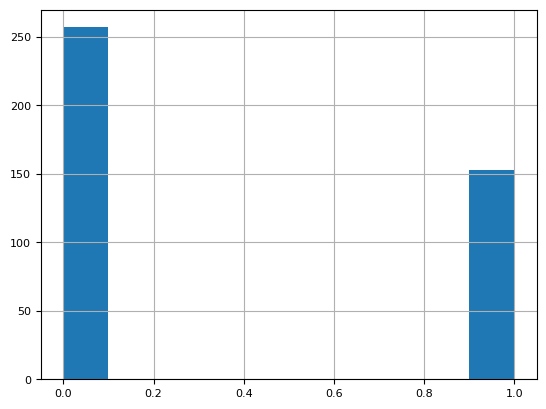

In [350]:
train['Diagnosis'].hist()

## Pie Chart

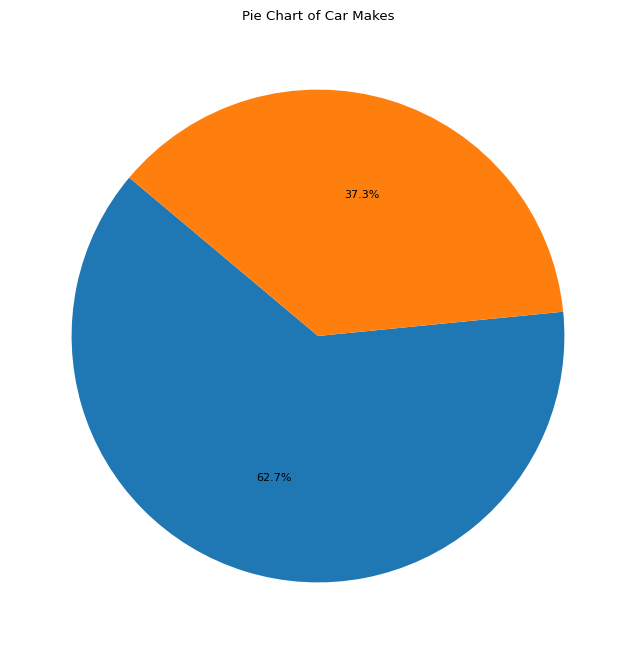

In [351]:
# 'make' 컬럼의 파이 차트
make_counts = train['Diagnosis'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(make_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Car Makes')
plt.show()

## BoxPlot

<Axes: >

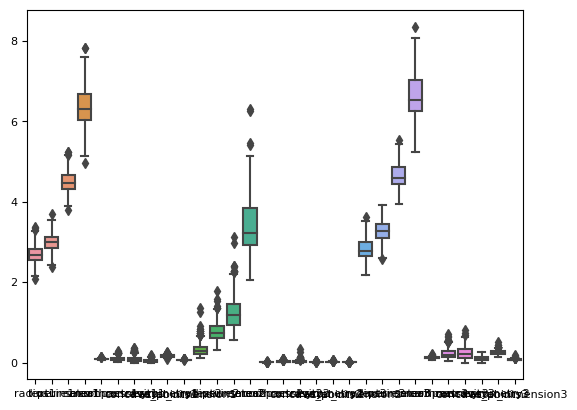

In [352]:
sns.boxplot(data = train.iloc[:,:30])

## Kernel Graph

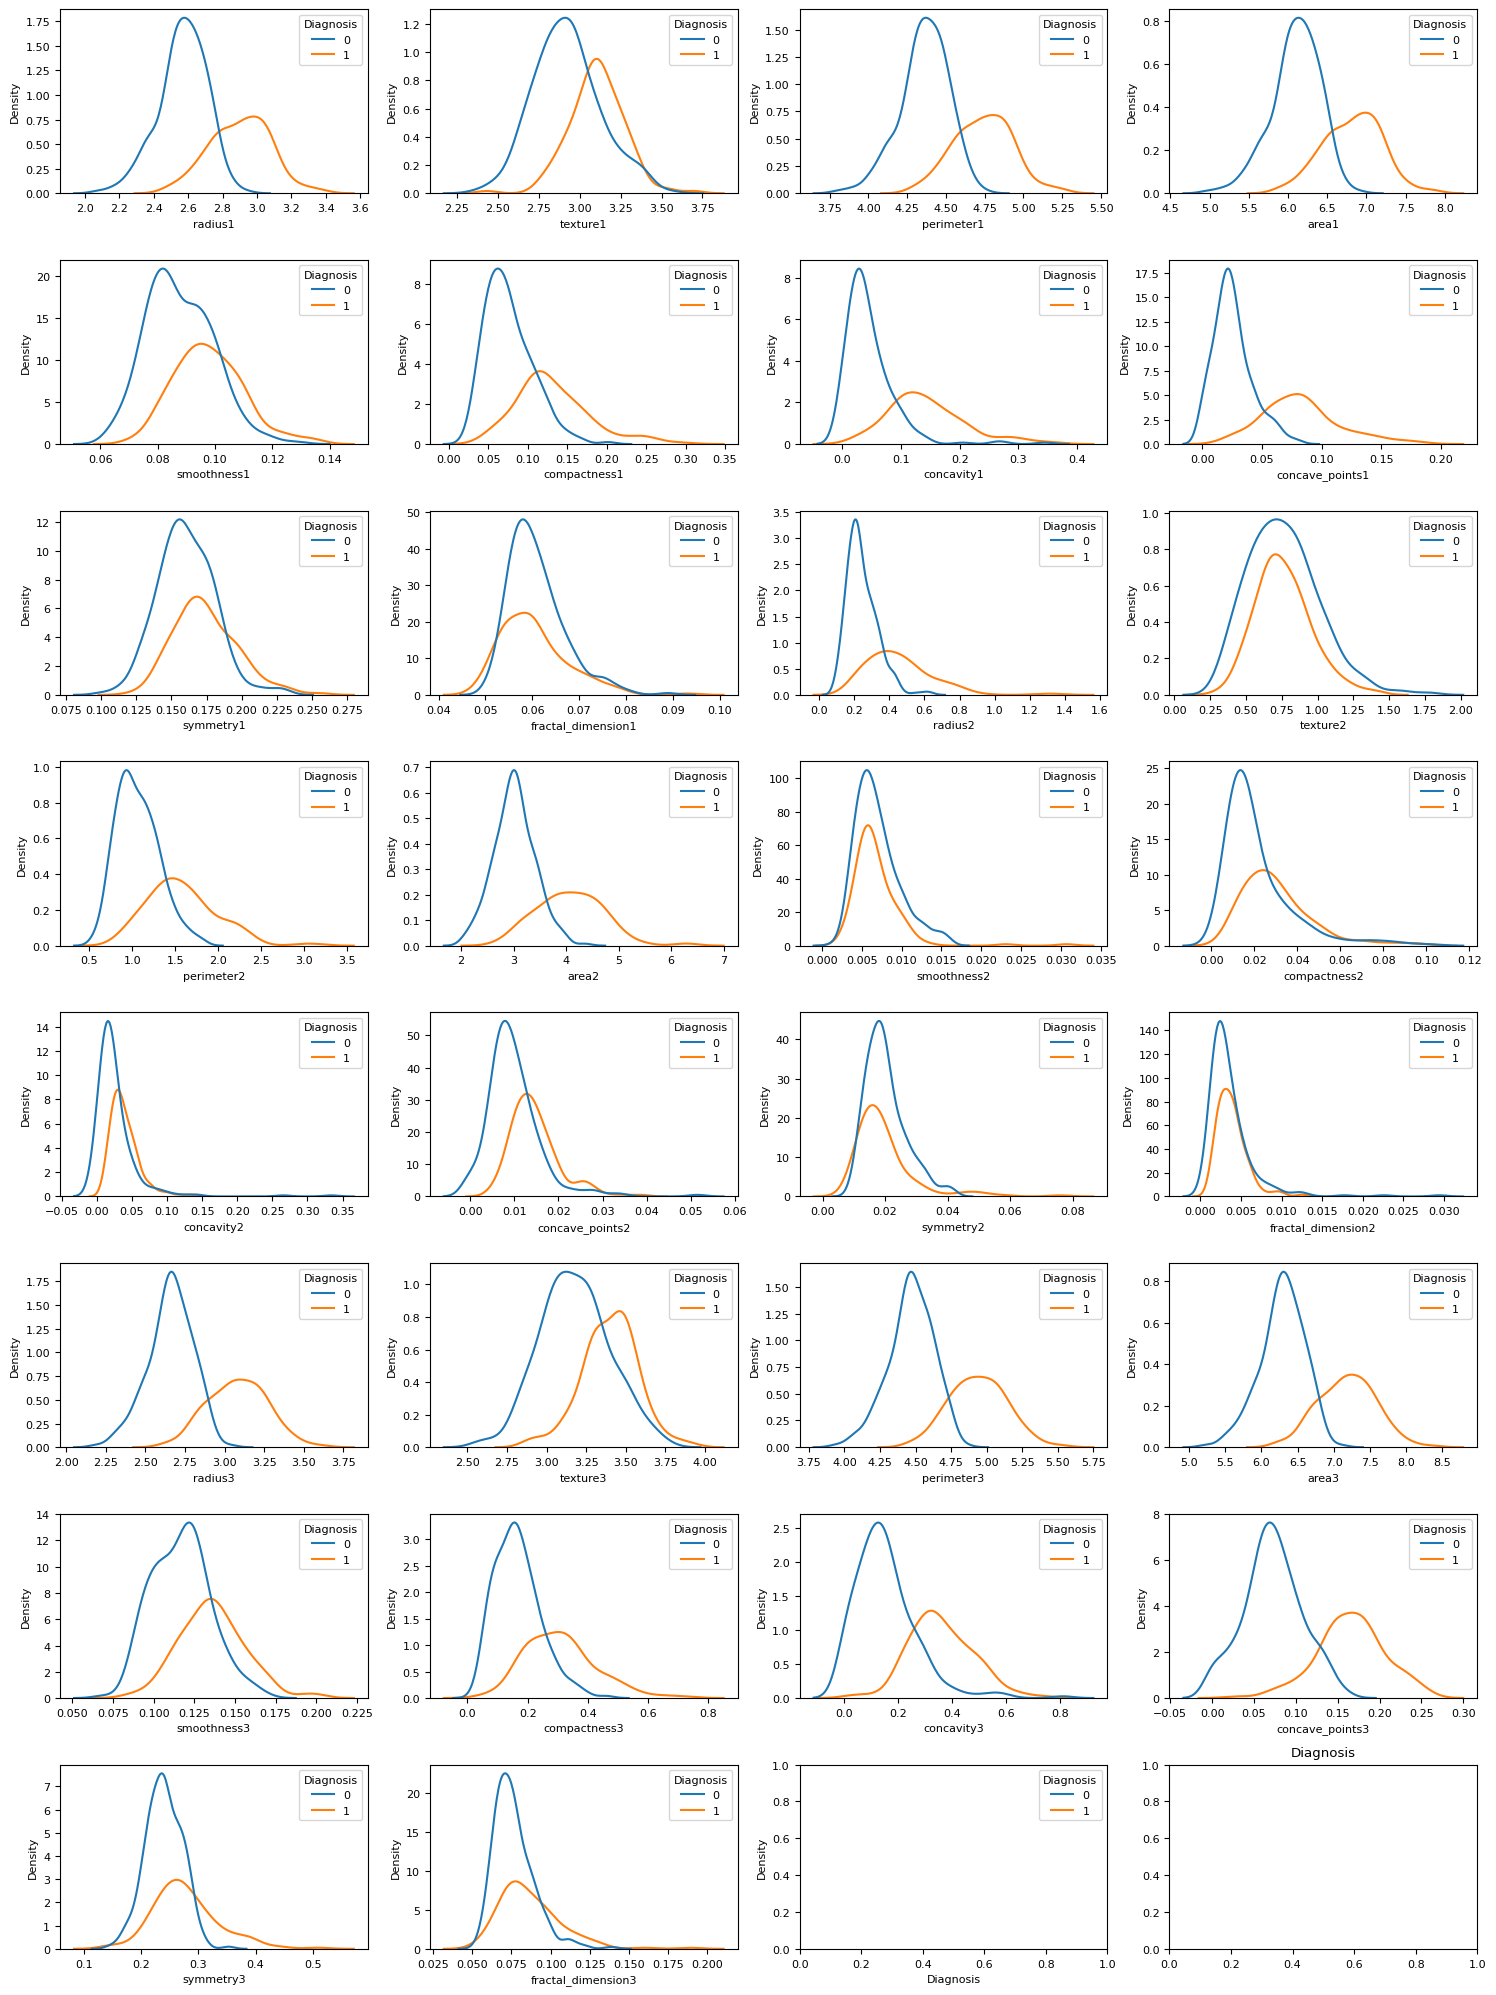

In [353]:
fig, axes = plt.subplots(8, 4, figsize=(15, 20))

for i, f in enumerate(train.columns):
    row = i // 4  # Row index
    col = i % 4  # Column index
    sns.kdeplot(x=f,data=train,hue='Diagnosis', ax=axes[row, col])
    plt.title(f)
plt.tight_layout()
plt.show()

## HeatMap

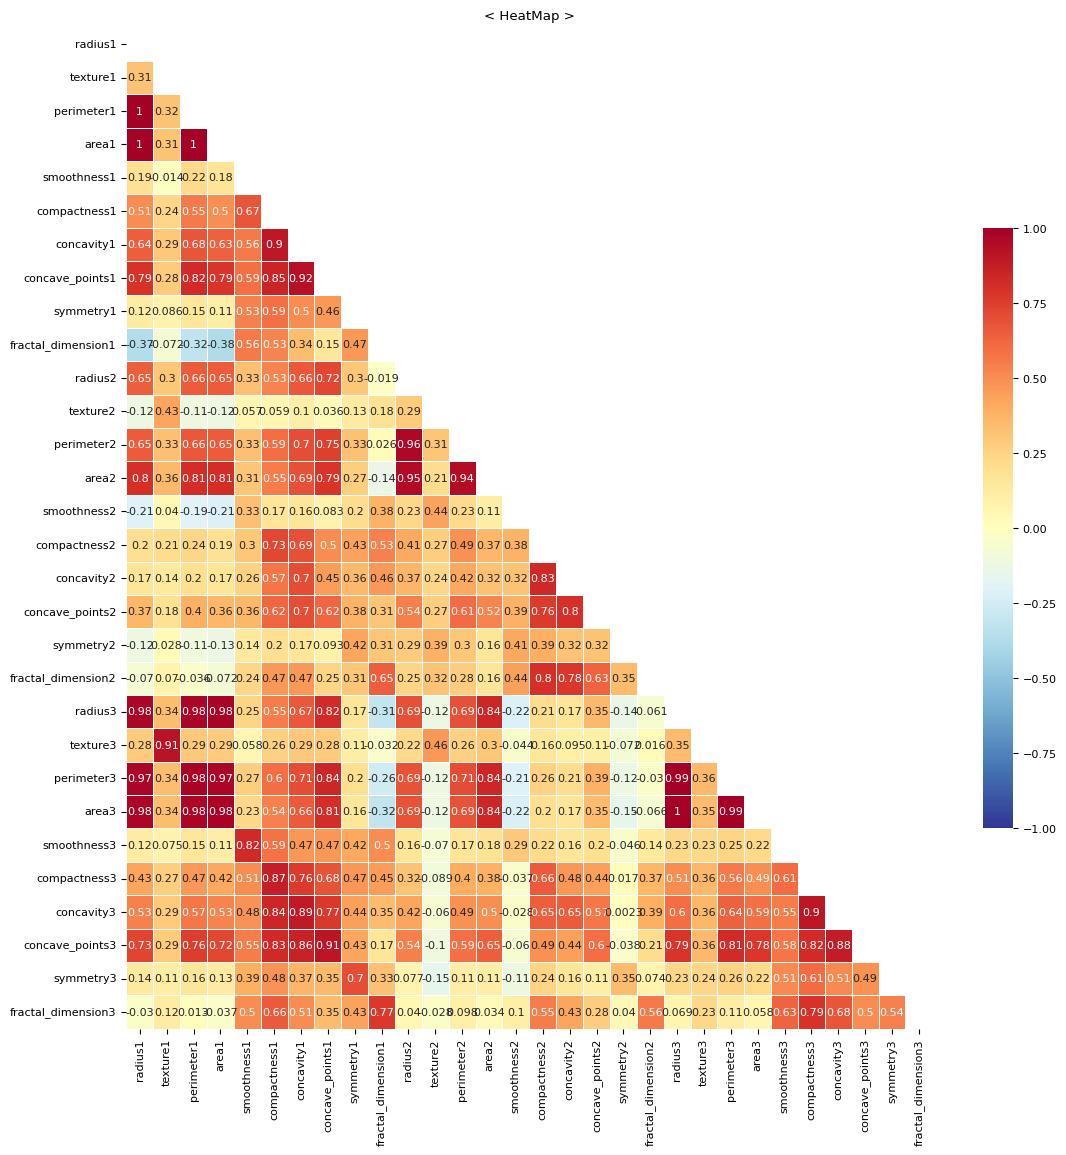

In [354]:
# 상관계수에 따른 HeatMap
#plt.rc('font', size=5)

non_cat = [col for col in train.columns if train[col].nunique() >= 6]

corr_df = train[non_cat].corr() # 상관계수
fig, ax = plt.subplots(figsize=(13,13))

mask = np.zeros_like(corr_df, dtype=np.bool) # 삼각형 마스크
mask[np.triu_indices_from(mask)] = True
plt.title('< HeatMap >')
sns.heatmap(corr_df, # 히트맵
            cmap = 'RdYlBu_r',
            annot = True,
            mask=mask,
            linewidths=.5,
            cbar_kws={"shrink": .6},
            vmin = -1.0, vmax = 1.0)
plt.show()

##PairPlot

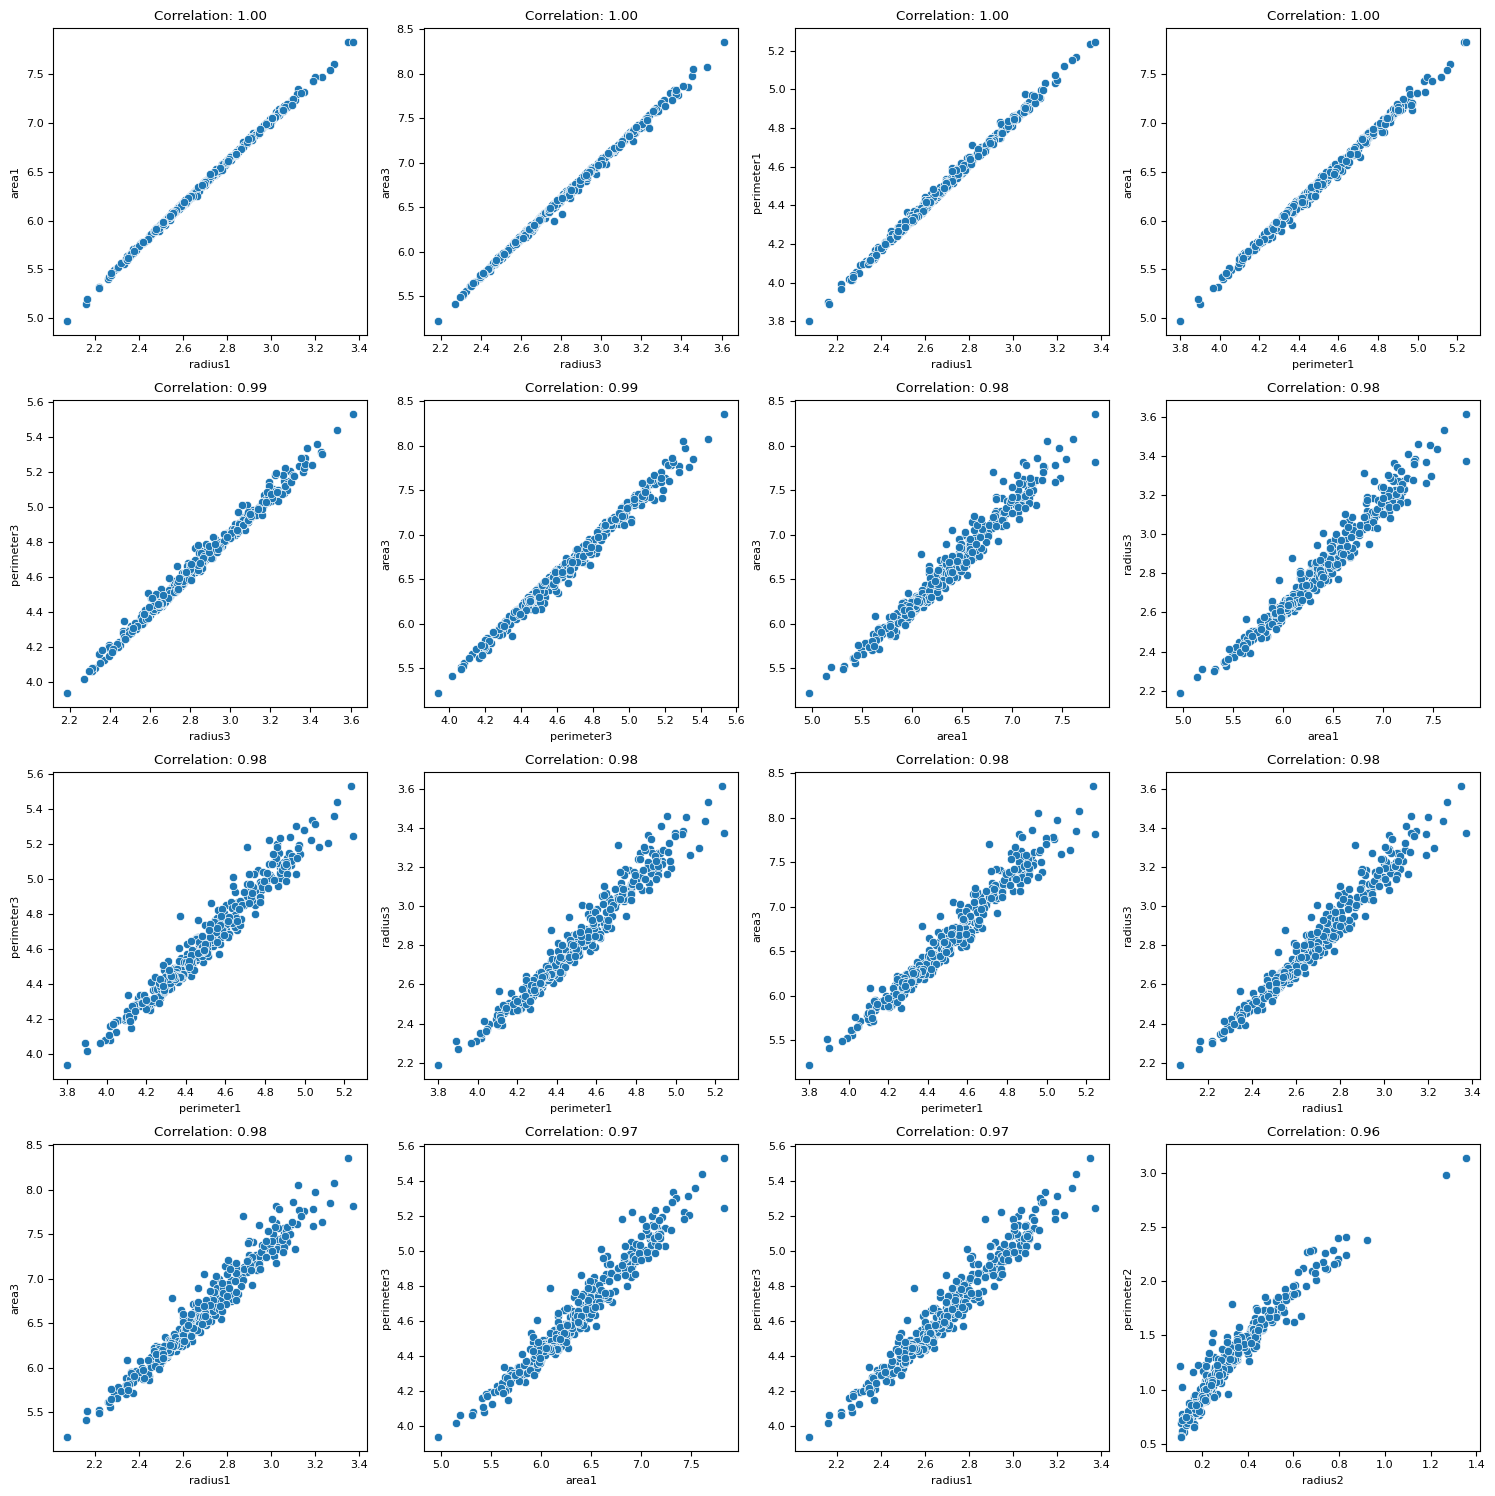

In [355]:
corr_matrix = train[non_cat].corr()

top_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
top_corr = top_corr.head(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(top_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()

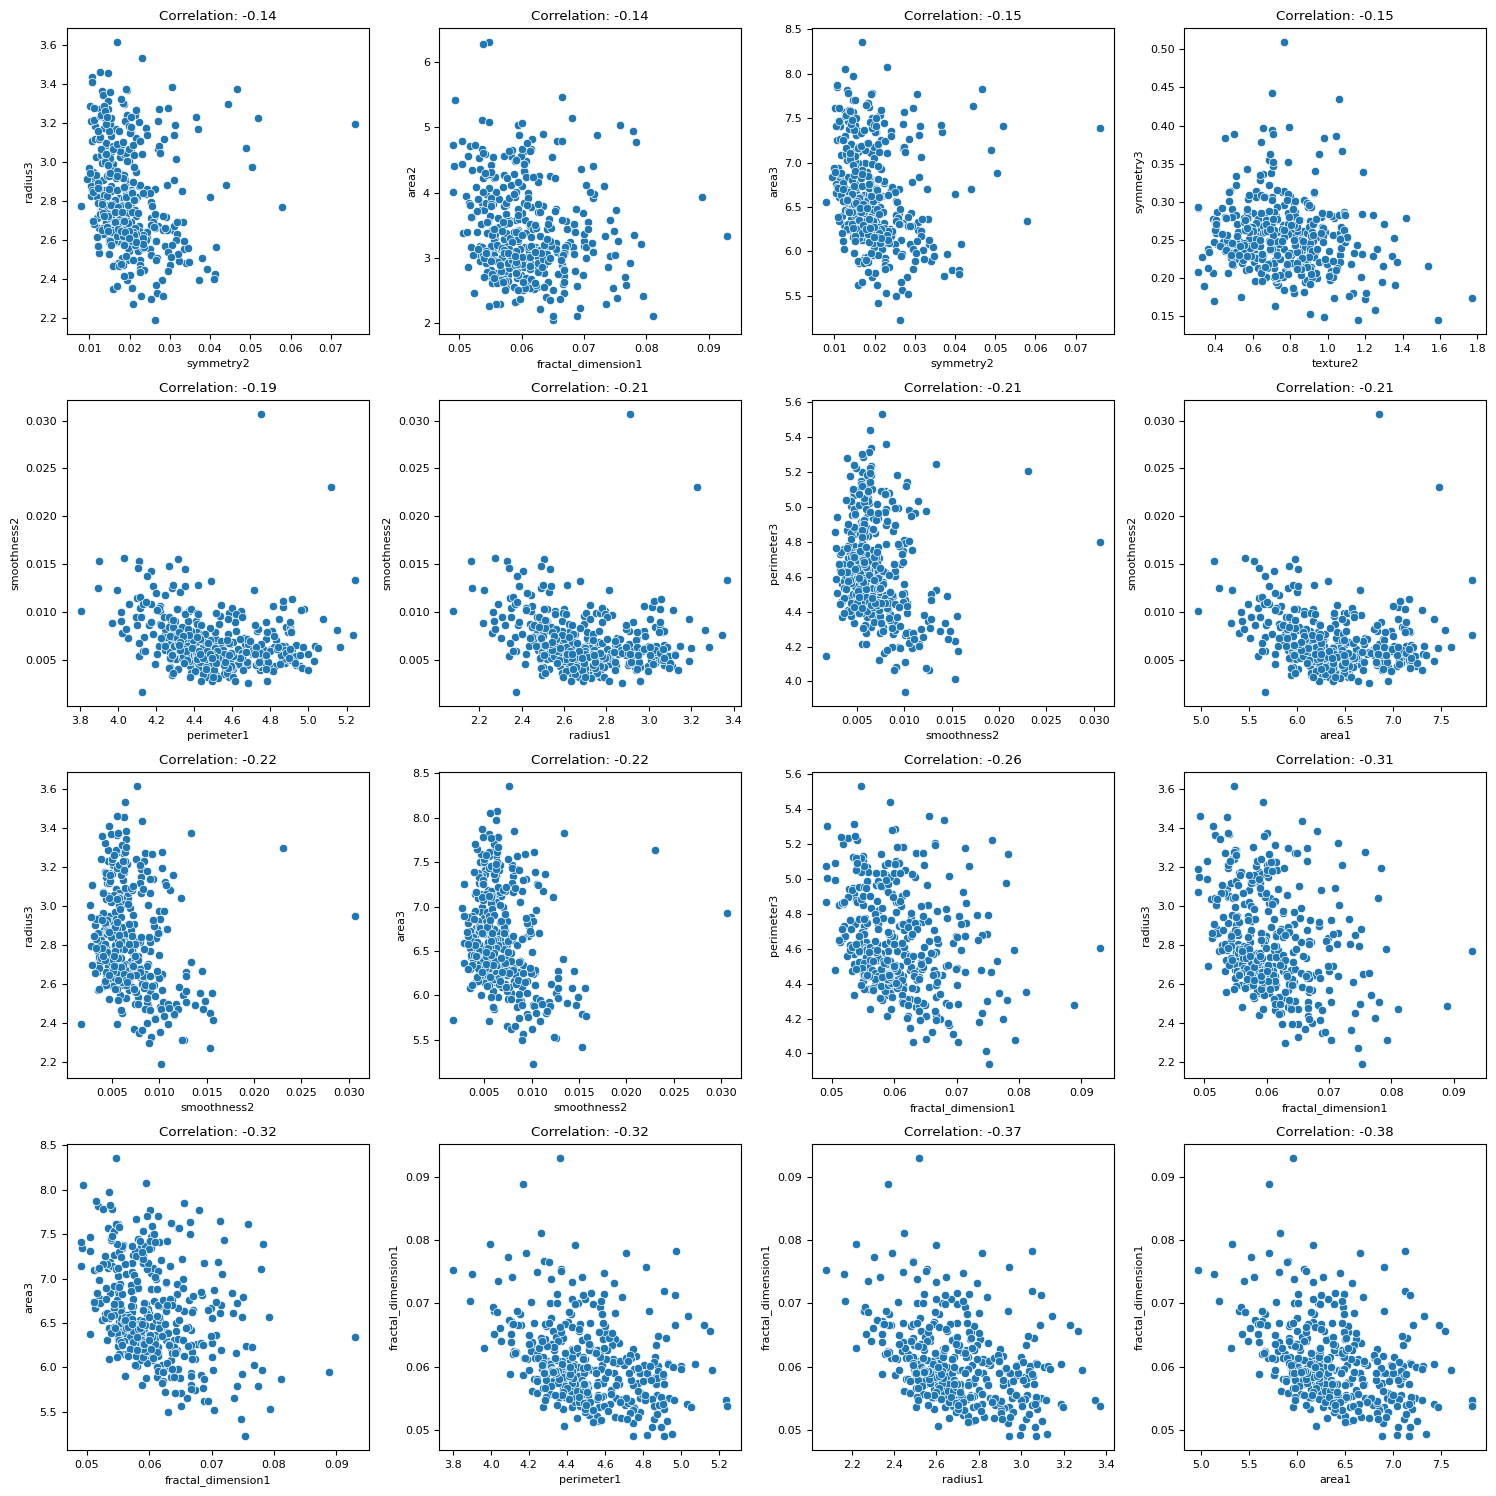

In [356]:
corr_matrix = train[non_cat].corr()

bot_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                .stack()
                .sort_values(ascending=False))
bot_corr = bot_corr.tail(16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, (columns, corr_value) in enumerate(bot_corr.items()):
    ax = axes[i // 4, i % 4]
    sns.scatterplot(x=train[columns[0]], y=train[columns[1]], ax=ax)
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_title(f'Correlation: {corr_value:.2f}')

plt.tight_layout()
plt.show()



---



# Model



#VIF

In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = train.columns
vif_data["VIF"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

print(vif_data)

               feature            VIF
0              radius1  491960.025045
1             texture1    3343.749318
2           perimeter1  204580.348896
3                area1  809941.529277
4          smoothness1     463.403109
5         compactness1     170.167347
6           concavity1     182.509103
7      concave_points1     192.082264
8            symmetry1     259.888087
9   fractal_dimension1    1414.523704
10             radius2     142.120140
11            texture2      81.652762
12          perimeter2     623.229635
13               area2    2131.211920
14         smoothness2      30.077794
15        compactness2      53.661201
16          concavity2      47.509632
17     concave_points2      53.727675
18           symmetry2      42.282735
19  fractal_dimension2      28.823385
20             radius3  153561.312153
21            texture3    5813.951616
22          perimeter3  143964.571270
23               area3  243671.978551
24         smoothness3     467.870619
25        co

In [358]:
del_col = ['radius1','area1']
train = train.drop(columns=del_col)
valid = valid.drop(columns=del_col)
test = test.drop(columns=del_col)

## Logistic Regression

In [359]:
from sklearn.linear_model import LogisticRegression
from scipy import stats

X_train = train.drop('Diagnosis', axis=1)
y_train = train['Diagnosis']
X_valid = valid.drop('Diagnosis', axis=1)
y_valid = valid['Diagnosis']
X_test = test.drop('Diagnosis', axis=1)
y_test = test['Diagnosis']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coef_mat = pd.DataFrame()
coef_mat['column'] = X_train.columns
coef_mat['coef'] = model.coef_[0]
coef_mat

,column,coef
0,texture1,1.123547
1,perimeter1,0.419944
2,smoothness1,0.240048
3,compactness1,0.440818
4,concavity1,0.656696
5,concave_points1,0.408103
6,symmetry1,0.232931
7,fractal_dimension1,0.060438
8,radius2,0.318307
9,texture2,-0.903257


In [360]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

def logit_eval(label, pred, str) :
    plt.figure() # 새로운 그래프 창 생성
    plt.rc('font', size=15)
    con_mat = confusion_matrix(label.values, pred)

    sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
                xticklabels=['B [0]', 'M [1]'],
                yticklabels=['B [0]', 'M [1]'],
                annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(str+" accuracy: ", accuracy_score(label.values, pred))
    print(str+" recall: ", round(recall_score(label.values, pred),3))
    print(str+" precision: ", round(precision_score(label.values, pred),3))
    print(str+" f1-score: ", round(f1_score(label.values, pred),3))
    print()

Train accuracy:  0.9560975609756097
Train recall:  0.922
Train precision:  0.959
Train f1-score:  0.94



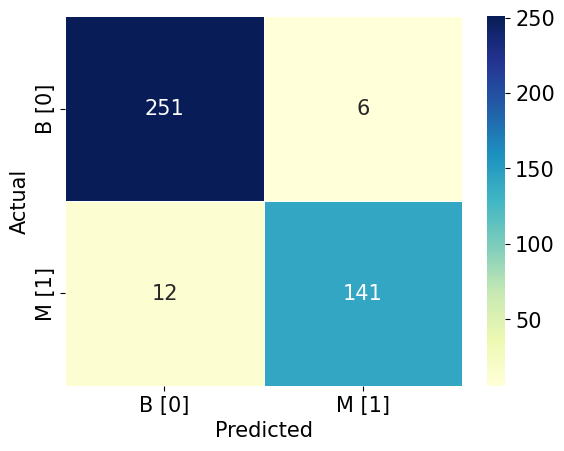

In [361]:
# Train dataset에 대한 성능 평가
X_train = train.drop('Diagnosis', axis=1)
y_train = train['Diagnosis']

# 예측 및 성능 평가
y_pred_train = model.predict(X_train)
logit_eval(y_train, y_pred_train, 'Train')

Valid accuracy:  0.9315068493150684
Valid recall:  0.926
Valid precision:  0.893
Valid f1-score:  0.909



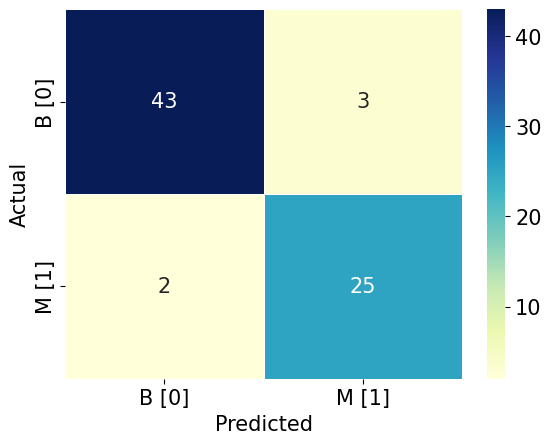

In [362]:
# Valid dataset에 대한 성능 평가
X_valid = valid.drop('Diagnosis', axis=1)
y_valid = valid['Diagnosis']

# 예측 및 성능 평가 (Validation)
y_pred_valid = model.predict(X_valid)

# 예측 및 성능 평가
y_pred_train = model.predict(X_valid)
logit_eval(y_valid, y_pred_valid, 'Valid')

Test accuracy:  0.9651162790697675
Test recall:  0.906
Test precision:  1.0
Test f1-score:  0.951



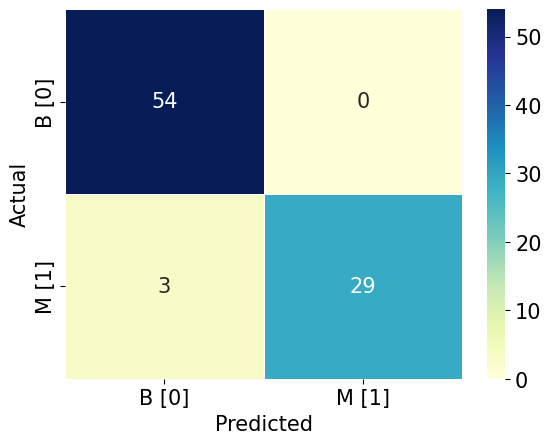

In [363]:
# Test dataset에 대한 성능 평가
X_test = test.drop('Diagnosis', axis=1)
y_test = test['Diagnosis']

# 예측 및 성능 평가 (testation)
y_pred_test = model.predict(X_test)

# 예측 및 성능 평가
y_pred_train = model.predict(X_test)
logit_eval(y_test, y_pred_test, 'Test')



---



In [364]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

def logit_eval(label, pred, str) :
    con_mat = confusion_matrix(label.values, pred)

    #sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
                #xticklabels=['B [0]', 'M [1]'],
                #yticklabels=['B [0]', 'M [1]'],
                #annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    print(str+" accuracy: ", accuracy_score(label.values, pred))
    print(str+" recall: ", round(recall_score(label.values, pred),3))
    print(str+" precision: ", round(precision_score(label.values, pred),3))
    print(str+" f1-score: ", round(f1_score(label.values, pred),3))
    print()

In [365]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

par_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in par_list :
  lasso = LogisticRegression(penalty='l1', solver='saga',C=i ,max_iter=1000)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_valid)
  logit_eval(y_valid, y_pred, 'Lasso_Valid')

Lasso_Valid accuracy:  0.8904109589041096
Lasso_Valid recall:  0.741
Lasso_Valid precision:  0.952
Lasso_Valid f1-score:  0.833

Lasso_Valid accuracy:  0.9315068493150684
Lasso_Valid recall:  0.889
Lasso_Valid precision:  0.923
Lasso_Valid f1-score:  0.906

Lasso_Valid accuracy:  0.9178082191780822
Lasso_Valid recall:  0.852
Lasso_Valid precision:  0.92
Lasso_Valid f1-score:  0.885

Lasso_Valid accuracy:  0.9452054794520548
Lasso_Valid recall:  0.889
Lasso_Valid precision:  0.96
Lasso_Valid f1-score:  0.923

Lasso_Valid accuracy:  0.9315068493150684
Lasso_Valid recall:  0.889
Lasso_Valid precision:  0.923
Lasso_Valid f1-score:  0.906



In [366]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

par_list = [1.0, 3.0 ,5.0, 10.0, 15.0, 20.0]

for i in par_list :
  ridge = RidgeClassifier(alpha=i)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_valid)
  logit_eval(y_valid, y_pred, 'Ridge_Valid')

Ridge_Valid accuracy:  0.9726027397260274
Ridge_Valid recall:  0.926
Ridge_Valid precision:  1.0
Ridge_Valid f1-score:  0.962

Ridge_Valid accuracy:  0.958904109589041
Ridge_Valid recall:  0.889
Ridge_Valid precision:  1.0
Ridge_Valid f1-score:  0.941

Ridge_Valid accuracy:  0.958904109589041
Ridge_Valid recall:  0.889
Ridge_Valid precision:  1.0
Ridge_Valid f1-score:  0.941

Ridge_Valid accuracy:  0.9452054794520548
Ridge_Valid recall:  0.889
Ridge_Valid precision:  0.96
Ridge_Valid f1-score:  0.923

Ridge_Valid accuracy:  0.9315068493150684
Ridge_Valid recall:  0.852
Ridge_Valid precision:  0.958
Ridge_Valid f1-score:  0.902

Ridge_Valid accuracy:  0.9315068493150684
Ridge_Valid recall:  0.852
Ridge_Valid precision:  0.958
Ridge_Valid f1-score:  0.902



In [367]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

par_list = [0.07, 0.05, 0.03, 0.01, 0.005]

for i in par_list :
  elastic_model = SGDClassifier(penalty='elasticnet', l1_ratio=0.5, alpha=i, max_iter=1000)
  elastic_model.fit(X_train, y_train)
  y_pred = elastic_model.predict(X_valid)
  logit_eval(y_valid, y_pred, 'Elastic_Valid')

Elastic_Valid accuracy:  0.863013698630137
Elastic_Valid recall:  0.667
Elastic_Valid precision:  0.947
Elastic_Valid f1-score:  0.783

Elastic_Valid accuracy:  0.8767123287671232
Elastic_Valid recall:  0.667
Elastic_Valid precision:  1.0
Elastic_Valid f1-score:  0.8

Elastic_Valid accuracy:  0.9041095890410958
Elastic_Valid recall:  0.889
Elastic_Valid precision:  0.857
Elastic_Valid f1-score:  0.873

Elastic_Valid accuracy:  0.9315068493150684
Elastic_Valid recall:  0.852
Elastic_Valid precision:  0.958
Elastic_Valid f1-score:  0.902

Elastic_Valid accuracy:  0.9315068493150684
Elastic_Valid recall:  0.815
Elastic_Valid precision:  1.0
Elastic_Valid f1-score:  0.898



In [368]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

par_list = [0.1, 0.3, 0.5, 0.7, 0.9]

for i in par_list :
  elastic_model = SGDClassifier(penalty='elasticnet', l1_ratio=i, alpha=0.01, max_iter=1000)
  elastic_model.fit(X_train, y_train)
  y_pred = elastic_model.predict(X_valid)
  logit_eval(y_valid, y_pred, 'Valid')

Valid accuracy:  0.9178082191780822
Valid recall:  0.889
Valid precision:  0.889
Valid f1-score:  0.889

Valid accuracy:  0.9315068493150684
Valid recall:  0.852
Valid precision:  0.958
Valid f1-score:  0.902

Valid accuracy:  0.863013698630137
Valid recall:  0.63
Valid precision:  1.0
Valid f1-score:  0.773

Valid accuracy:  0.9178082191780822
Valid recall:  0.815
Valid precision:  0.957
Valid f1-score:  0.88

Valid accuracy:  0.9178082191780822
Valid recall:  0.815
Valid precision:  0.957
Valid f1-score:  0.88



In [369]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier


# Lasso, Ridge, ElasticNet 모델 초기화
lasso = LogisticRegression(penalty='l1', solver='saga',C=0.3 ,max_iter=1000)
ridge = RidgeClassifier(alpha=1.0)
elastic = SGDClassifier(penalty='elasticnet', l1_ratio=0.5, alpha=0.01, max_iter=1000)


# 예측
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
elastic.fit(X_train,y_train)
y_pred_train_l = lasso.predict(X_train)
y_pred_train_r = ridge.predict(X_train)
y_pred_train_e = elastic.predict(X_train)

# 모델 학습 및 평가(Train)
logit_eval(y_train, y_pred_train_l, 'Lasso_Train')
logit_eval(y_train, y_pred_train_r, 'Ridge_Train')
logit_eval(y_train, y_pred_train_e, 'Elastic_Train')

Lasso_Train accuracy:  0.9292682926829269
Lasso_Train recall:  0.863
Lasso_Train precision:  0.943
Lasso_Train f1-score:  0.901

Ridge_Train accuracy:  0.9609756097560975
Ridge_Train recall:  0.902
Ridge_Train precision:  0.993
Ridge_Train f1-score:  0.945

Elastic_Train accuracy:  0.9024390243902439
Elastic_Train recall:  0.745
Elastic_Train precision:  0.991
Elastic_Train f1-score:  0.851



In [370]:
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
elastic.fit(X_train,y_train)
y_pred_valid_l = lasso.predict(X_valid)
y_pred_valid_r = ridge.predict(X_valid)
y_pred_valid_e = elastic.predict(X_valid)

# 모델 학습 및 평가(Validation)
logit_eval(y_valid, y_pred_valid_l, 'Lasso_Valid')
logit_eval(y_valid, y_pred_valid_r, 'Ridge_Valid')
logit_eval(y_valid, y_pred_valid_e, 'Elastic_Valid')

Lasso_Valid accuracy:  0.9315068493150684
Lasso_Valid recall:  0.889
Lasso_Valid precision:  0.923
Lasso_Valid f1-score:  0.906

Ridge_Valid accuracy:  0.9726027397260274
Ridge_Valid recall:  0.926
Ridge_Valid precision:  1.0
Ridge_Valid f1-score:  0.962

Elastic_Valid accuracy:  0.821917808219178
Elastic_Valid recall:  0.963
Elastic_Valid precision:  0.684
Elastic_Valid f1-score:  0.8



In [371]:
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
elastic.fit(X_train,y_train)
y_pred_test_l = lasso.predict(X_test)
y_pred_test_r = ridge.predict(X_test)
y_pred_test_e = elastic.predict(X_test)

# 모델 학습 및 평가(Test)
logit_eval(y_test, y_pred_test_l, 'Lasso_Test')
logit_eval(y_test, y_pred_test_r, 'Ridge_Test')
logit_eval(y_test, y_pred_test_e, 'Elastic_Test')

Lasso_Test accuracy:  0.9534883720930233
Lasso_Test recall:  0.875
Lasso_Test precision:  1.0
Lasso_Test f1-score:  0.933

Ridge_Test accuracy:  0.9651162790697675
Ridge_Test recall:  0.906
Ridge_Test precision:  1.0
Ridge_Test f1-score:  0.951

Elastic_Test accuracy:  0.9651162790697675
Elastic_Test recall:  0.938
Elastic_Test precision:  0.968
Elastic_Test f1-score:  0.952



## Logistic Regression

In [372]:
Validation MAE: 88175.34313939008
Validation MSE: 194347621114.30695

SyntaxError: ignored